In [26]:
%pylab inline
from collections import Counter
import glob
import dateutil
import pandas as pd
import datetime

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
# Collect a list of all the filenames that will be working with

files = glob.glob('/mnt/nfs-marketdepth/houghton/data/twitter/raw/posts_sample*.gz')
len(files)

10603

In [3]:
files = files[7750:8206]

In [4]:
dt = datetime.datetime(2014, 11, 1)
end = datetime.datetime(2015, 7, 1)
step = datetime.timedelta(days=1)

dates = []
while dt < end:
    dates.append(dt.strftime('%Y%m%d'))
    dt += step

In [46]:
post_counter = Counter()
keywords = ['charleston', 'confederateflag', 'charlestonshooting', 'ameshooting', 'blacklivesmatter']

tallydict = dict([(keyword, Counter()) for keyword in keywords])

In [47]:
for i, zfile in enumerate(files):            
    try:
        print '%i of %i'%(i, len(files))
        with gzip.open(zfile) as gzf:
            #look at each line in the file
            for line in gzf:
                try:
                    #parse the json object (in Unicage this will probably be implemented with jq)
                    parsed_json = json.loads(line)
                    #we only want to look at tweets that are in english, so check that this is the case.
                    if parsed_json.has_key('lang'):
                        if parsed_json['lang'] =='en':
                            #look only at messages with more than two hashtags, 
                            #as these are the only ones that make connections
                            if len(parsed_json['entities']['hashtags']) >=1:
                                #extract the hashtags to a list 
                                taglist = [entry['text'].lower() for entry in parsed_json['entities']['hashtags']]
                                #identify the date in the message - this is important because sometimes 
                                #messages come out of order.
                                date = dateutil.parser.parse(parsed_json['created_at']).strftime("%Y%m%d") 
                                
                                for tag in taglist:
                                    if tag in keywords:
                                        tallydict[tag][date] += 1
                                #if keyword in taglist:
                                #    post_counter[date] += 1
                except:
                    print 'd',
                    raise
    except:
        print 'error in', zfile
        raise

0 of 456
1 of 456
2 of 456
3 of 456
4 of 456
5 of 456
6 of 456
7 of 456
8 of 456
9 of 456
10 of 456
11 of 456
12 of 456
13 of 456
14 of 456
15 of 456
16 of 456
17 of 456
18 of 456
19 of 456
20 of 456
21 of 456
22 of 456
23 of 456
24 of 456
25 of 456
26 of 456
27 of 456
28 of 456
29 of 456
30 of 456
31 of 456
32 of 456
33 of 456
34 of 456
35 of 456
36 of 456
37 of 456
38 of 456
39 of 456
40 of 456
41 of 456
42 of 456
43 of 456
44 of 456
45 of 456
46 of 456
47 of 456
48 of 456
49 of 456
50 of 456
51 of 456
52 of 456
53 of 456
54 of 456
55 of 456
56 of 456
57 of 456
58 of 456
59 of 456
60 of 456
61 of 456
62 of 456
63 of 456
64 of 456
65 of 456
66 of 456
67 of 456
68 of 456
69 of 456
70 of 456
71 of 456
72 of 456
73 of 456
74 of 456
75 of 456
76 of 456
77 of 456
78 of 456
79 of 456
80 of 456
81 of 456
82 of 456
83 of 456
84 of 456
85 of 456
86 of 456
87 of 456
88 of 456
89 of 456
90 of 456
91 of 456
92 of 456
93 of 456
94 of 456
95 of 456
96 of 456
97 of 456
98 of 456
99 of 456
100 of 456

In [51]:
postdf = pd.DataFrame()
for keyword, counter in tallydict.iteritems():
    #posts['index'] = post_counter.keys()
    posts
    print dict(counter)

{'20150617': 13, '20150616': 6, '20150624': 241, '20150620': 680, '20150619': 879, '20150618': 2702, '20150622': 280, '20150621': 492, '20150625': 71, '20150623': 188}
{'20150624': 5, '20150620': 55, '20150621': 48, '20150619': 216, '20150618': 1209, '20150622': 28, '20150623': 9}
{'20150624': 432, '20150620': 484, '20150619': 87, '20150618': 11, '20150622': 333, '20150623': 465, '20150625': 159, '20150621': 307}
{'20150624': 285, '20150620': 2097, '20150619': 4995, '20150618': 12386, '20150622': 456, '20150623': 229, '20150625': 79, '20150621': 993}
{'20150617': 87, '20150616': 64, '20150624': 209, '20150620': 259, '20150619': 532, '20150618': 496, '20150622': 177, '20150621': 227, '20150625': 72, '20150623': 205}


In [20]:
post_counter.

Counter({'20150618': 2698, '20150619': 879, '20150620': 680, '20150621': 492, '20150622': 280, '20150624': 241, '20150623': 188, '20150625': 71, '20150617': 13, '20150616': 6})

In [32]:
posts = pd.DataFrame()
posts['datestr'] = post_counter.keys()
posts['Post Volume'] = post_counter.values()
posts['Format Date'] = posts['datestr'].apply(dateutil.parser.parse)
posts.sort(columns='datestr', inplace=True)

posts

,datestr,Post Volume,Format Date
1,20150616,6,2015-06-16
0,20150617,13,2015-06-17
5,20150618,2698,2015-06-18
3,20150619,879,2015-06-19
4,20150620,680,2015-06-20
7,20150621,492,2015-06-21
6,20150622,280,2015-06-22
9,20150623,188,2015-06-23
2,20150624,241,2015-06-24
8,20150625,71,2015-06-25


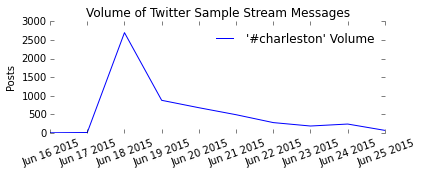

In [44]:
plt.figure(figsize=(6,2))
plt.plot(posts['Format Date'], posts['Post Volume'], label="'#charleston' Volume")
plt.box('off')
plt.legend(loc='upper right', frameon=False)
plt.title('Volume of Twitter Sample Stream Messages')
plt.ylabel('Posts')
plt.xticks(rotation=20);
